In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

link_V6='https://docs.google.com/spreadsheets/d/e/2PACX-1vRJdgkqLqyXxoY1pYvjZfgCsKd5vLK5gQMbL6L2_mknpumbK3AUt4mZ8hRtCbDa0w/pub?output=xlsx'
circuitos=pd.read_excel(link_V6)

#circuitos=pd.read_excel('dataset_pfinal_ANS_V6.xlsx')
circuitos.set_index(['Id'],inplace=True)
circuitos.shape

(1097, 31)

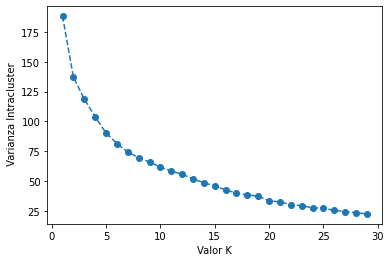

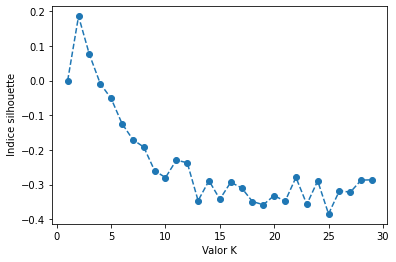

(128, 29)

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X= circuitos.loc[:, ~circuitos.columns.isin( ['Potencia TIEPI','Substation Name','Transformer','MV Feeder Code','Feeder Name MV','REPORTETELCO AnexohojaCondiciones'])]
X=X[X["ZONANUEVA"]=="Zona V - Metropolitana Noroccidente"]
X=X.drop(['ZONANUEVA'], axis=1)

X = pd.get_dummies(X)

from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_escalado = scaler.fit_transform(X)


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


varianza_intra_cluster = []
silhouettes = []
rango=range(1,30)
for k in rango :
    
    model = KMeans(n_clusters=k)
    model.fit(X_escalado)
    
    #Suma de distancias al cuadrado de las observaciones al centro de su closter. varianza intracluster
    varianza_intra_cluster.append(model.inertia_)
    try:
        silhouette = silhouette_score(X, model.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
plt.plot(rango,varianza_intra_cluster,'o--')
plt.xlabel("Valor K")
plt.ylabel(" Varianza Intracluster")
plt.savefig('Varianza Intracluster.png', format='png', dpi=300)
plt.show()

plt.plot(rango,silhouettes,'o--')
plt.xlabel("Valor K")
plt.ylabel(" Indice silhouette")
plt.savefig('Indice silhouette.png', format='png', dpi=300)
plt.show()

X_escalado.shape

In [8]:
X_clusterizado = X.copy()
model = KMeans(n_clusters=12)
clusters=model.fit_predict(X_escalado)
X_clusterizado['cluster']=clusters
X_clusterizado.head()

,Nominal Voltage Level,out of which Overhead Bare Conductor,out of which Overhead Cable,out of which Underground Cable,Triple phase Network,Tot Manual Switches-IMS-disconnectors nodes,Fuses on the line,Tickets_BT,Clientes_Total,SAIDI_EXTERNAL,SAIDI_OTHER_CAUSES,SAIDI_PLANNED,SAIFI_EXTERNAL,SAIFI_OTHER_CAUSES,SAIFI_PLANNED,SAIDI_EXTERNAL_PROPIO,SAIDI_OTHER_CAUSES_PROPIO,SAIDI_PLANNED_PROPIO,SAIFI_EXTERNAL_PROPIO,SAIFI_OTHER_CAUSES_PROPIO,SAIFI_PLANNED_PROPIO,ARBOLES_CIRCUITO,PODAS,Municipio/Localidad_Cajica,Municipio/Localidad_Chia,Municipio/Localidad_Cota,Municipio/Localidad_Suba,Municipio/Localidad_Tabio,Municipio/Localidad_Tenjo,cluster
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,11.4,2.859,0.321,12.552,15.732,18.0,1.0,118.0,5455.0,0.000000,0.684488,0.105770,0.000000,0.004299,0.000392,0.000000,470.546380,72.710988,0.000000,2.955175,0.269599,26.0,10.0,0,0,0,1,0,0,1
14.0,11.4,25.816,0.612,12.197,38.625,33.0,22.0,1142.0,10610.0,0.025763,0.213303,0.041518,0.000724,0.007176,0.000167,9.105738,75.389953,14.674071,0.255983,2.536298,0.059000,182.0,173.0,1,0,0,0,0,0,3
16.0,11.4,0.018,0.000,0.374,0.391,0.0,0.0,7.0,190.0,0.000000,0.011675,0.001339,0.000000,0.000313,0.000119,0.000000,230.420111,26.431733,0.000000,6.168973,2.353590,0.0,0.0,0,1,0,0,0,0,5
17.0,11.4,2.280,0.000,0.133,2.413,10.0,2.0,105.0,528.0,0.004128,0.080674,0.002022,0.000035,0.001433,0.000292,29.317491,572.971551,14.362212,0.250292,10.178436,2.076464,0.0,0.0,0,1,0,0,0,0,5
18.0,11.4,30.403,1.630,3.728,35.761,20.0,43.0,840.0,2461.0,0.001199,0.421480,0.335374,0.000011,0.008122,0.002737,1.827070,642.238815,511.032558,0.017398,12.375880,4.170008,926.0,476.0,0,0,1,0,0,0,6


In [12]:
cols_SAIDI= ['SAIDI_EXTERNAL_PROPIO', 'SAIDI_OTHER_CAUSES_PROPIO']
porc_circuitos=0.4

X_clusterizado['suma_saidi']= X_clusterizado[cols_SAIDI].sum(axis=1)
X_clusterizado_ordenado = X_clusterizado.sort_values(['suma_saidi'], ascending=[False])
agrupamiento = X_clusterizado_ordenado.groupby('cluster')
porc_circuitos = 0.4
for cluster, circuitos in agrupamiento:
  num_circuitos_cluster= circuitos.shape[0]
  circuitos_a_seleccionar=circuitos.head(round(num_circuitos_cluster * porc_circuitos))
  circuitos_a_seleccionar.to_excel(f'Circuitos Cluster_{cluster}_KMeans.xlsx')
 

In [15]:
!pip install pca
from pca import pca
cols_SAIDI= ['SAIDI_EXTERNAL_PROPIO', 'SAIDI_OTHER_CAUSES_PROPIO','SAIFI_EXTERNAL_PROPIO', 'SAIDI_OTHER_CAUSES_PROPIO','SAIFI_PLANNED',
             'SAIDI_OTHER_CAUSES','SAIFI_OTHER_CAUSES','suma_saidi','SAIFI_OTHER_CAUSES_PROPIO','SAIDI_PLANNED_PROPIO',
             'SAIFI_PLANNED_PROPIO','SAIDI_EXTERNAL']
X_clusterizado_ordenado
X_clusterizado_ordenado=X_clusterizado_ordenado.loc[:, ~X_clusterizado_ordenado.columns.isin(cols_SAIDI)]
for cluster in list(X_clusterizado_ordenado['cluster'].unique()):
  componentes= min(X_clusterizado_ordenado[X_clusterizado_ordenado['cluster']==cluster].shape[0],
                                              X_clusterizado_ordenado[X_clusterizado_ordenado['cluster']==cluster].shape[1])
  if componentes > 2:
      componentes=0.90

  model = pca(normalize=False, n_components=componentes)
  results = model.fit_transform(X_clusterizado_ordenado[X_clusterizado_ordenado['cluster']==cluster])
  results['loadings'].to_excel(f'loadings_cluster{cluster}_kmeans.xlsx')
  results['topfeat'].to_excel(f'topfeat_cluster{cluster}_kmeans.xlsx')
  print(f" Cluster: {cluster} Componentes:{componentes}\n{results['topfeat']}")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [20] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [1] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [20] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
 Cluster: 6 Componentes:0.9
     PC                                      feature       loading  type
0   PC1                               Clientes_Total  9.870205e-01  best
1   PC1                        Nominal Voltage Level -1.475967e-03  weak
2   PC1         out of which Overhead Bare Conductor  3